In [2]:
import os
os.chdir('/home/ron/Documents/DenseSeg')

import torch
from matplotlib import pyplot as plt
from dataset.jsrt_dataset import JSRTDataset, TRAINING_SHAPES

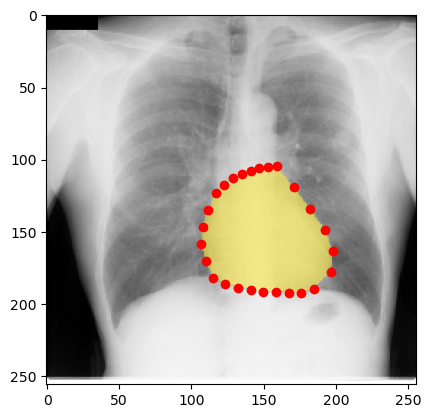

In [3]:
anatomy = 'heart'
anatomy_idx = JSRTDataset.get_anatomical_structure_index()[anatomy]
shapes = (TRAINING_SHAPES[:, anatomy_idx[0]:anatomy_idx[1]] + 1) / 2 * 256

idx = 0
sample = shapes[idx]
del shapes

img, lm, _, seg_mask = JSRTDataset('train', normalize_landmarks=False)[idx]
seg_mask = seg_mask[list(JSRTDataset.get_anatomical_structure_index().keys()).index(anatomy)].bool()

plt.figure()
plt.imshow(img.squeeze(), cmap='gray')
plt.imshow(seg_mask.squeeze(), alpha=seg_mask.float()*.5)
plt.scatter(sample[:, 0], sample[:, 1], c='r')

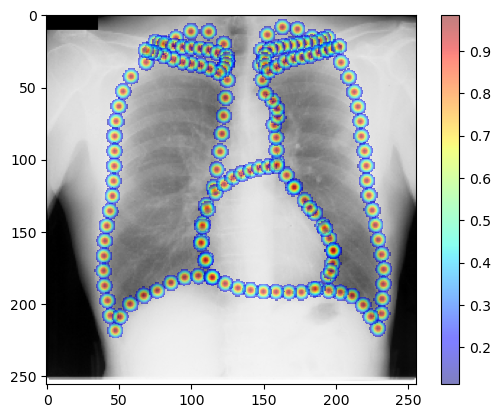

In [10]:
c = 3
H, W = img.shape[-2:]
grid = torch.stack(torch.meshgrid(torch.arange(256), torch.arange(256), indexing='ij'), dim=-1)
grid = grid.reshape(-1, 2)
pt = lm
dist = grid.unsqueeze(1) - pt.unsqueeze(0)
gaussian = torch.exp(-torch.sum(dist**2, dim=-1) / (2 * c**2))
gaussian = gaussian.reshape(256, 256 , len(pt))

gaussian_masked = torch.where(gaussian > 0.1, gaussian, torch.nan)

plt.imshow(img.squeeze(), cmap='gray')
for g in gaussian_masked.transpose(0, 2):
    plt.imshow(g, cmap='jet', alpha=.5)
plt.colorbar()

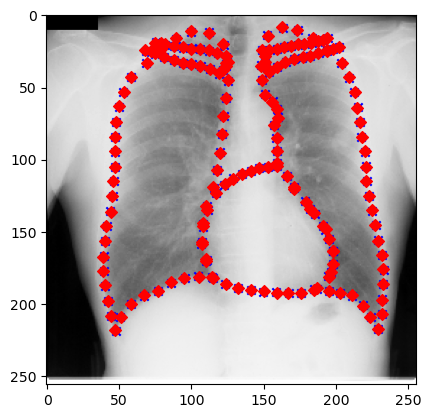

In [8]:
from utils import extract_kpts_from_heatmap

lm_hat = extract_kpts_from_heatmap(gaussian.permute(2, 0, 1).unsqueeze(0)).squeeze()

plt.figure()
plt.imshow(img.squeeze(), cmap='gray')
plt.scatter(lm[:, 0], lm[:, 1], c='b', marker='x')
plt.scatter(lm_hat[:, 0], lm_hat[:, 1], c='r', marker='D')

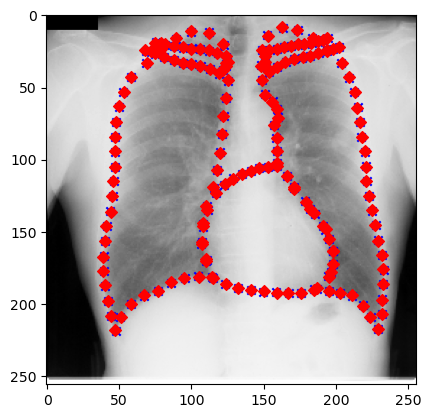

In [6]:
lm_hat_unravel = torch.unravel_index(gaussian_hat.argmax(0), (H, W))
lm_hat_unravel = torch.stack(lm_hat_unravel, dim=-1)

plt.figure()
plt.imshow(img.squeeze(), cmap='gray')
plt.scatter(lm[:, 0], lm[:, 1], c='b', marker='x')
plt.scatter(lm_hat_unravel[:, 0], lm_hat_unravel[:, 1], c='r', marker='D')